In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


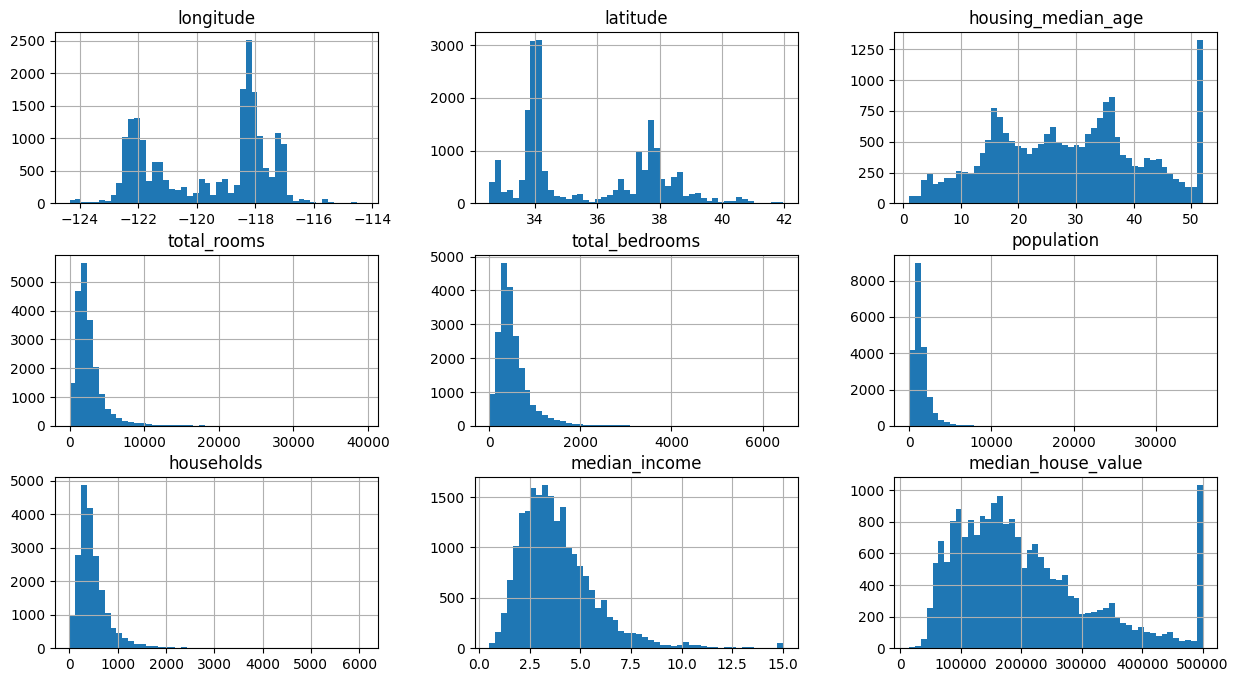

In [12]:
%matplotlib inline
df.hist(bins=50, figsize=(15,8))
plt.show()

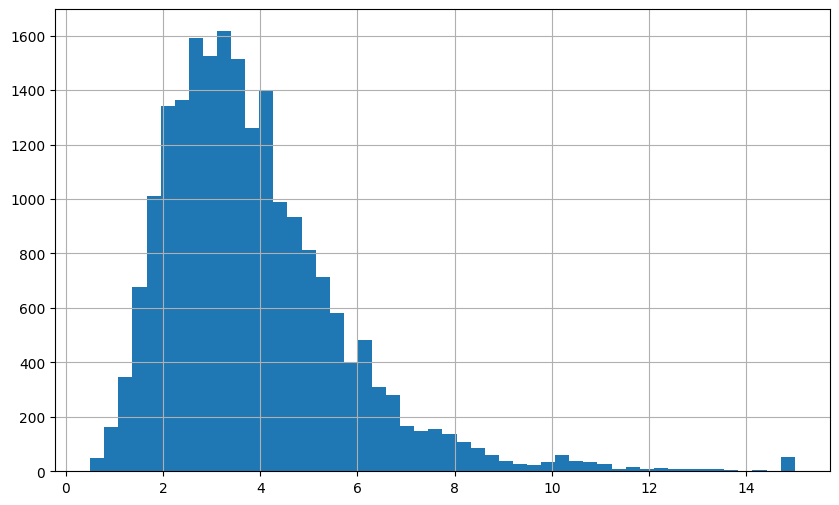

In [32]:
df['median_income'].hist(bins=50, figsize=(10,6))
plt.show()

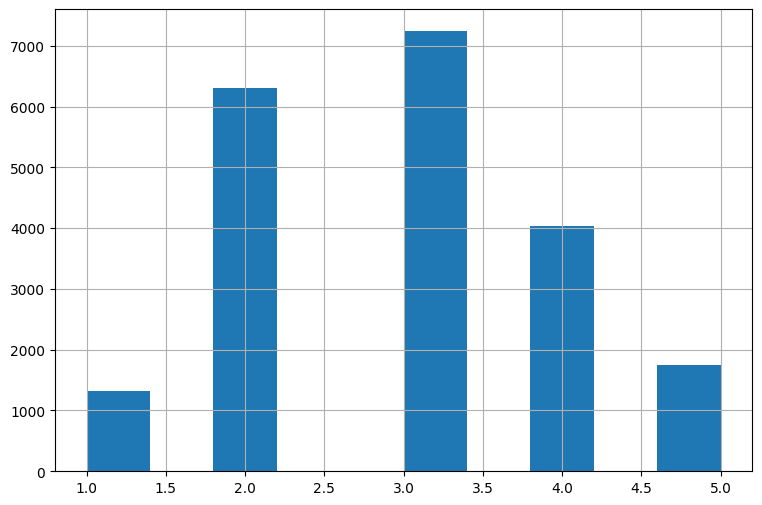

In [54]:
df['cut_value']=pd.cut(df['median_house_value'], bins=[0, 70000, 150000, 250000, 400000, np.inf], labels=[1,2,3,4,5])
df['cut_value'].hist(figsize=(9,6))
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=50)

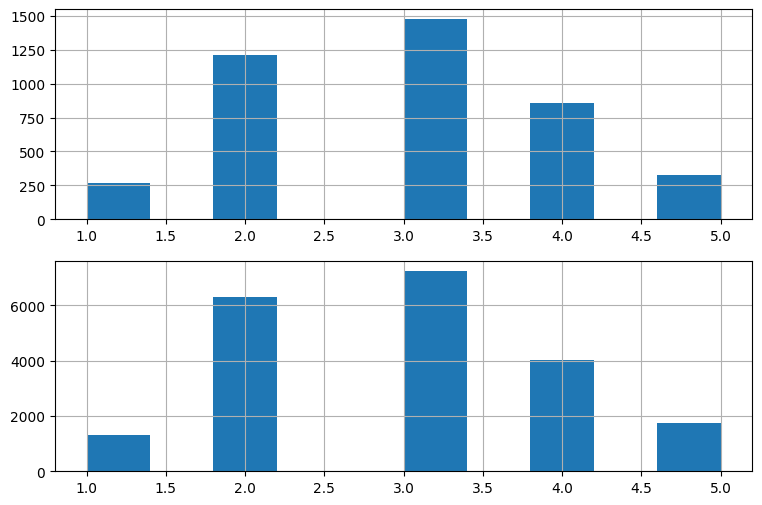

In [57]:
plt.subplot(2,1,1)
test_set['cut_value'].hist(figsize=(9,6))
plt.subplot(2,1,2)
df['cut_value'].hist(figsize=(9,6))
plt.show()

In [65]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4450,-118.21,34.07,42.0,902.0,318.0,1312.0,323.0,1.9375,168800.0,<1H OCEAN
14253,-117.10,32.71,29.0,3422.0,713.0,2775.0,644.0,1.7075,86900.0,NEAR OCEAN
15338,-117.29,33.20,16.0,2150.0,461.0,1428.0,407.0,2.4754,157300.0,NEAR OCEAN
18156,-122.06,37.36,35.0,2693.0,493.0,1343.0,455.0,6.0777,327500.0,<1H OCEAN
13431,-117.42,34.10,18.0,3977.0,809.0,2231.0,742.0,4.1399,115400.0,INLAND


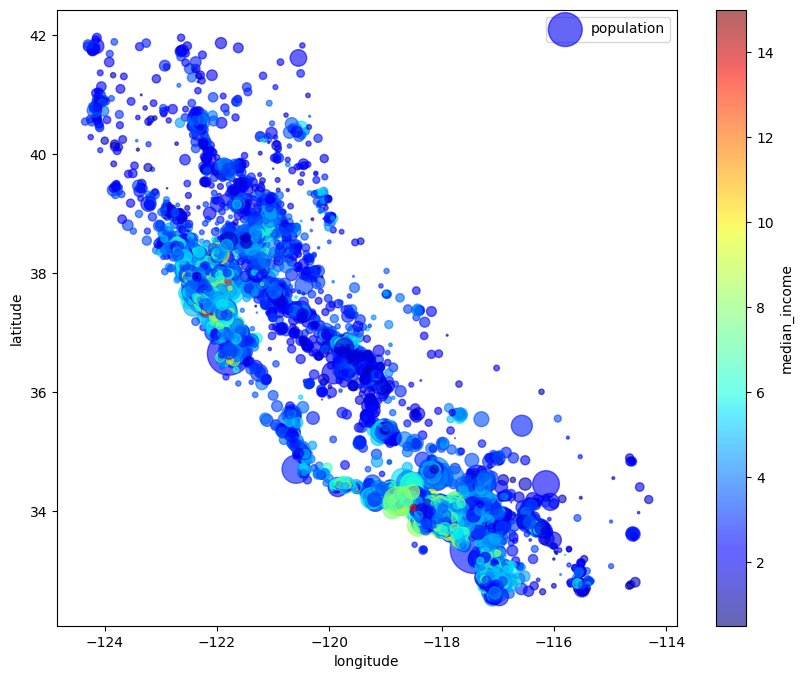

In [102]:
train_set.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.6,
    s=train_set['population']/30,
    c='median_income',
    cmap='jet',
    figsize=(10,8),
    colorbar=True,
    label='population')
plt.show()

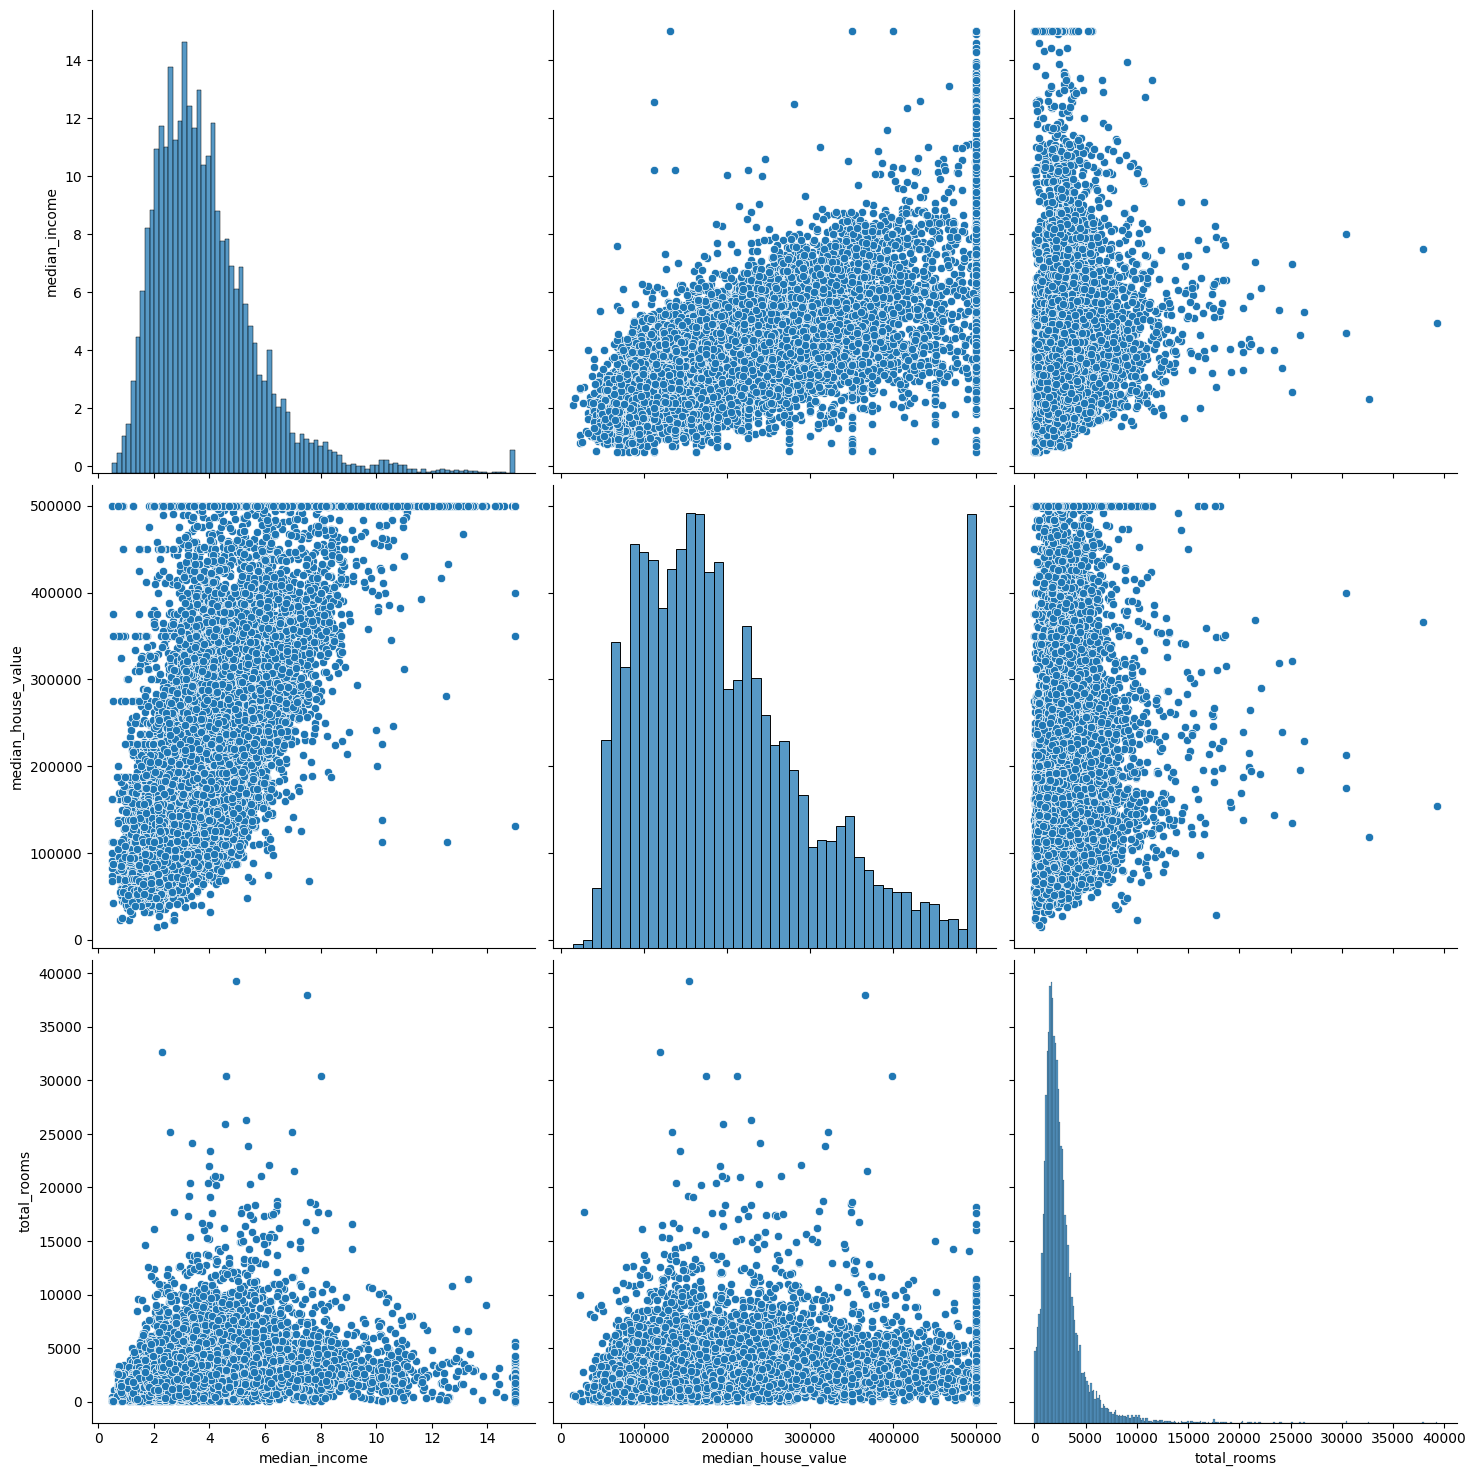

In [103]:
sns.pairplot(train_set[['median_income', 'median_house_value', 'total_rooms']], height= 5)
plt.show()
